<a href="https://colab.research.google.com/github/Gavinkim/seasonality_predict/blob/master/bitcoin_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test RMSE 1091.0


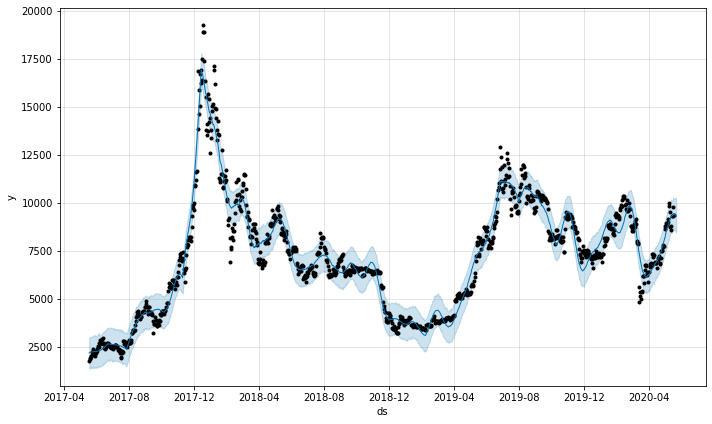

In [113]:
# -*- coding: utf-8 -*-
%matplotlib inline
# !pip install fbprophet
from google.colab import drive
# drive.mount('/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from fbprophet import Prophet

plt.rcParams["figure.figsize"] = (20,5)
#data set file path
file_path='/drive/My Drive/study/deeplearning/market-price.csv'
#prophet 을 사용하기 위해서는 피처들을 아래와 같이 변경해야 한다.
bitcoin_df = pd.read_csv(file_path,names=['ds','y'])
#상한가 설정
# bitcoin_df['cap'] = 20000
prophet = Prophet(seasonality_mode = 'multiplicative',
                  # growth='logistic',#상한가 적용을 위한 파라미터
                  yearly_seasonality = True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_prior_scale=0.5)
#학습
prophet.fit(bitcoin_df)

#학습 데이터셋 기반의 5일 단위 예측 데이터를 얻을수 있다. 
#아래는 데이터에 존재하지 않는 5일단위의 매래를 예측 한것이다.
future_data = prophet.make_future_dataframe(periods=5,freq='d')
#상한가 설정
# future_data['cap'] = 20000
forecast_data = prophet.predict(future_data)
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

#시각화, 검은 점(실제가격),파란선(예측가격)
fig1 = prophet.plot(forecast_data)

#트렌드 정보 시각화
# fig2 = prophet.plot_components(forecast_data)

########### RMSE 와 함께 사용하기
test_file_path=file_path
bitcoin_test_df = pd.read_csv(test_file_path,names=['ds','y'])
#모델이 예측한 마지막 5일의 예측 데이터
pred_y = forecast_data.yhat.values[-5:]
#실제 5일 가격 데이터
test_y = bitcoin_test_df.y.values
#마지막 5일 예측 데이터의 최소값
pred_y_lower = forecast_data.yhat_lower.values[-5:]
#마지막 5일의 예측 데이터의 최대값
pred_y_upper = forecast_data.yhat_upper.values[-5:]

#test rmse
rmse=sqrt(mean_squared_error(pred_y.shape,test_y.shape))
print('Test RMSE',rmse)
#todo; 모델 개선을 위해 상한선과, 하한선 설정, 이상치 제거